<a href="https://colab.research.google.com/github/Dakbuu/dak/blob/main/GAN%20%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

(x_train, t_train), (x_test, t_test) = mnist.load_data() #MNIST 읽어 들이기
print(x_train.shape, x_test.shape) #28x28의 손으로 쓴 문자 이미지가 6만 장 

(60000, 28, 28) (10000, 28, 28)


In [3]:
#각 픽셀의 값을 -1에서 1의 범위에 넣는다 
x_train = x_train / 255 * 2 - 1
x_test = x_test / 255 * 2 - 1

#손으로 쓴 문자 이미지의 표시

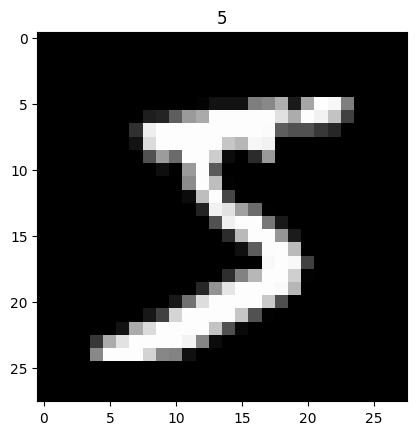

(60000, 784) (10000, 784)


In [8]:
plt.imshow(x_train[0].reshape(28, 28), cmap="gray")
plt.title(t_train[0])
plt.show()

#1차원으로 변환한다
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape, x_test.shape)

In [9]:
n_learn = 20001 #학습 횟수 
interval = 2000 #이미지를 생성하는 간격 
batch_size = 32
n_noize = 128 #노이즈의 수 
img_size = 28 #생성되는 이미지의 높이와 폭
alpha = 0.2 #Leaky ReLU의 음의 영역에서의 기울기 

from tensorflow.python.keras.optimizers import adam_v2
optimizer = adam_v2.Adam(0.08, 0.5)

In [13]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, LeakyReLU

#Generator의 망 구축 
generator = Sequential()
generator.add(Dense(256, input_shape=(n_noize,)))
generator.add(LeakyReLU(alpha=alpha))
generator.add(Dense(512))
generator.add(LeakyReLU(alpha=alpha))
generator.add(Dense(1024))
generator.add(LeakyReLU(alpha=alpha))
generator.add(Dense(img_size**2, activation="tanh"))
print(generator.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 784)              

In [23]:
#Discriminator의 망 구축
discriminator = Sequential()

In [26]:
discriminator.add(Dense(512, input_shape=(img_size**2,)))
discriminator.add(LeakyReLU(alpha=alpha))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(alpha=alpha))
discriminator.add(Dense(1, activation="sigmoid"))
discriminator.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
print(discriminator.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 257       
_________________________________________________________________
dense_32 (Dense)             (None, 512)               1024      
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 512)              

In [ ]:
from tensorflow.python.keras.models
from tensorflow.python.keras.layers import Input